In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

bigPath = '/home/aashinshazar/beta/cookiesinthejar/'

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    part_files = np.array(data['filenames'])
    part_targets = np_utils.to_categorical(np.array(data['target']), 2)
    return part_files, part_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset(bigPath + 'train')
test_files, test_targets = load_dataset(bigPath +'test')
valid_files, valid_targets = load_dataset(bigPath +'valid')

print('There are %d training part images.' % len(train_files))
print('There are %d validation part images.' % len(valid_files))
print('There are %d test part images.'% len(test_files))

Using TensorFlow backend.


There are 450 training part images.
There are 29 validation part images.
There are 100 test part images.


In [2]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 100/100 [00:00<00:00, 178.67it/s]


In [28]:
from keras import applications

model = applications.InceptionResNetV2(include_top=False, weights='imagenet')

219062272/219055592 [==============================] - 27s 0us/step


In [29]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
import tensorflow as tf

model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               38535424  
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 514       
Total params: 38,535,938
Trainable params: 38,535,938
Non-trainable params: 0
_________________________________________________________________


In [30]:
from keras.callbacks import ModelCheckpoint
import time

import matplotlib.pyplot as plt
import numpy

epochs = 100
batch_size=20

bestModelSavedName = "InceptionResNetV2_Bench.hdf5"

checkpointer = ModelCheckpoint(filepath=bestModelSavedName, 
                               verbose=1, save_best_only=True)

history = model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets), 
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=2)

Train on 450 samples, validate on 29 samples
Epoch 1/100
 - 10s - loss: 6.8613 - acc: 0.5489 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00001: val_loss improved from inf to 9.39704, saving model to InceptionResNetV2_Bench.hdf5
Epoch 2/100
 - 0s - loss: 7.1042 - acc: 0.5556 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00002: val_loss did not improve from 9.39704
Epoch 3/100
 - 0s - loss: 7.0889 - acc: 0.5578 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00003: val_loss did not improve from 9.39704
Epoch 4/100
 - 0s - loss: 7.0889 - acc: 0.5578 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00004: val_loss did not improve from 9.39704
Epoch 5/100
 - 0s - loss: 7.0889 - acc: 0.5578 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00005: val_loss did not improve from 9.39704
Epoch 6/100
 - 0s - loss: 7.0889 - acc: 0.5578 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00006: val_loss did not improve from 9.39704
Epoch 7/100
 - 0s - loss: 7.0889 - acc: 0.5578 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 0


Epoch 00060: val_loss did not improve from 9.39704
Epoch 61/100
 - 1s - loss: 7.0889 - acc: 0.5578 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00061: val_loss did not improve from 9.39704
Epoch 62/100
 - 0s - loss: 7.0889 - acc: 0.5578 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00062: val_loss did not improve from 9.39704
Epoch 63/100
 - 1s - loss: 7.0889 - acc: 0.5578 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00063: val_loss did not improve from 9.39704
Epoch 64/100
 - 1s - loss: 7.0889 - acc: 0.5578 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00064: val_loss did not improve from 9.39704
Epoch 65/100
 - 0s - loss: 7.0889 - acc: 0.5578 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00065: val_loss did not improve from 9.39704
Epoch 66/100
 - 0s - loss: 7.0889 - acc: 0.5578 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00066: val_loss did not improve from 9.39704
Epoch 67/100
 - 0s - loss: 7.0889 - acc: 0.5578 - val_loss: 9.3970 - val_acc: 0.4138

Epoch 00067: val_loss did not improve fr

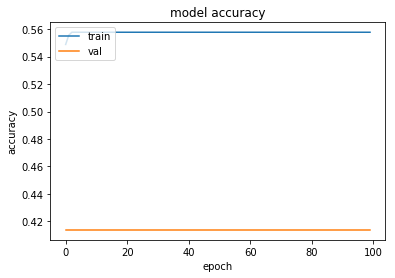

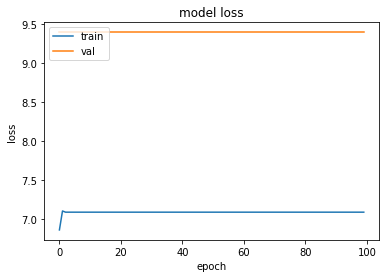

In [31]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
from sklearn.metrics import f1_score
import pandas as pd

model.load_weights('/home/aashinshazar/' + bestModelSavedName)

# get index of predicted part for each image in the test image set
part_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(part_predictions)==np.argmax(test_targets, axis=1))/len(part_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

print ("Fscore:", f1_score(np.argmax(test_targets, axis=1), part_predictions, average=None) )

y_actu = pd.Series(np.argmax(test_targets, axis=1), name='Actual')
y_pred = pd.Series(part_predictions, name='Predicted')

df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print (df_confusion)

Test accuracy: 63.0000%
Fscore: [0.77300613 0.        ]
Predicted    0  All
Actual             
0           63   63
1           37   37
All        100  100


/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
